In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer,Binarizer, Imputer, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline, make_union, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
%matplotlib inline

In [3]:
df = pd.read_csv('modeldf.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)


In [4]:
y = df['top250']

In [5]:
df.drop('top250', axis = 1, inplace = True)

In [6]:
df.drop('ReleaseOrdinal', axis = 1, inplace = True)
#realized that ReleaseOrdinal and ReleaseDaysDiff are perfectly correlated

In [7]:
x = df

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

Decision Tree
--

In [8]:
dt = DecisionTreeClassifier()

In [33]:
params = {'criterion': ['gini','entropy'],
         'max_features':['auto','sqrt'],
         'max_depth': [1,3,8,12,None]}

In [81]:
grid_search = GridSearchCV(dt, params)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt'], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 8, 12, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [82]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [83]:
grid_search.best_estimator_.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [84]:
grid_search.best_estimator_.score(x_train, y_train)

1.0

In [85]:
predictions = grid_search.best_estimator_.predict(x_test)

In [86]:
cm = metrics.confusion_matrix(y_test, predictions)
pd.DataFrame(cm, index = ['Not 250','250'], columns = ['Predict Not 250','Predict In 250'])

,Predict Not 250,Predict In 250
Not 250,72,0
250,2,76


In [87]:
grid_search.best_estimator_.score(x_test,y_test)

0.98666666666666669

In [88]:
zip(x_train.columns,grid_search.best_estimator_.feature_importances_)

[('Metascore', 0.0057154973895989702),
 ('Runtime', 0.1723313096017228),
 ('imdbRating', 0.71937051491170079),
 ('imdbVotes', 0.0092737160051698433),
 ('OscarsWin', 0.0),
 ('Nominations', 0.0087326136446997469),
 ('OtherWins', 0.082014099677083382),
 ('USA', 0.0),
 ('IsR', 0.0025622487700243729),
 ('ReleaseDaysDiff', 0.0)]

Random Forest
--

In [48]:
rfc = RandomForestClassifier()

In [49]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [185]:
parameters = {'n_estimators': [10,500,1000],
             'criterion': ['gini'],
             'max_features':['auto','log2',None],
              'min_samples_leaf': [1,50],
             'n_jobs': [-1]}

In [90]:
grid_searchrfc = GridSearchCV(rfc,parameters)

In [91]:
grid_searchrfc.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 500, 1000], 'max_features': ['auto', 'log2', None], 'n_jobs': [-1], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 50, 100, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [92]:
grid_searchrfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [93]:
grid_searchrfc.best_estimator_.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [94]:
grid_searchrfc.best_estimator_.score(x_train, y_train)

0.99714285714285711

In [95]:
predictionsrfc = grid_searchrfc.best_estimator_.predict(x_test)

In [96]:
cmrfc = metrics.confusion_matrix(y_test, predictionsrfc)
pd.DataFrame(cmrfc, index = ['Not 250','250'], columns = ['Predict Not 250','Predict In 250'])

,Predict Not 250,Predict In 250
Not 250,71,1
250,0,78


In [97]:
grid_searchrfc.best_estimator_.score(x_test,y_test)

0.99333333333333329

In [98]:
zip(x_train.columns,grid_searchrfc.best_estimator_.feature_importances_)

[('Metascore', 0.1014898351442507),
 ('Runtime', 0.013977323644573672),
 ('imdbRating', 0.52763828227155907),
 ('imdbVotes', 0.16883559554242414),
 ('OscarsWin', 0.0034401397689336464),
 ('Nominations', 0.049404101800520038),
 ('OtherWins', 0.060009629069178283),
 ('USA', 0.0016490806404407493),
 ('IsR', 0.0053431595849997935),
 ('ReleaseDaysDiff', 0.068212852533119886)]

Bagging Classifier (using decision trees)
--

In [99]:
bagging = BaggingClassifier()

In [100]:
bagging.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [101]:
paramsb = {'bootstrap': [True,False],
          'bootstrap_features':[True,False],
          'max_features': [0.5, 1.0],
          'max_samples': [0.5, 1.0],
          'n_estimators':[10,100]}

In [102]:
grid_searchb = GridSearchCV(bagging,paramsb)

In [103]:
grid_searchb.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0], 'bootstrap': [True, False], 'n_estimators': [10, 100], 'bootstrap_features': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [104]:
grid_searchb.best_estimator_

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=True, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [105]:
grid_searchb.best_estimator_.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=True, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [106]:
grid_searchb.best_estimator_.score(x_train, y_train)

1.0

In [107]:
predictionsb = grid_searchb.best_estimator_.predict(x_test)

In [108]:
cmb = metrics.confusion_matrix(y_test, predictionsb)
pd.DataFrame(cmb, index = ['Not 250','250'], columns = ['Predict Not 250','Predict In 250'])

,Predict Not 250,Predict In 250
Not 250,71,1
250,0,78


In [109]:
grid_searchb.best_estimator_.score(x_test, y_test)

0.99333333333333329

We will try to model without IMDB Rating and Votes, since we are getting really high scores and the top 250 list relies quite heavily on IMDB Ratings and Votes.
==

In [34]:
new_x = x

In [35]:
new_x.drop('imdbRating', axis = 1, inplace = True)

In [36]:
new_x.drop('imdbVotes', axis = 1, inplace = True)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(new_x,y, test_size = 0.3)

In [115]:
params = {'criterion': ['gini','entropy'],
         'max_features':['auto','sqrt'],
         'max_depth': [1,3,8,12,None]}

Decision Tree
--

In [116]:
grid_search = GridSearchCV(dt, params)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt'], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 8, 12, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [117]:
grid_search.best_estimator_.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [118]:
grid_search.best_estimator_.score(x_train, y_train)

1.0

In [119]:
predictions = grid_search.best_estimator_.predict(x_test)

In [120]:
cm = metrics.confusion_matrix(y_test, predictions)
pd.DataFrame(cm, index = ['Not 250','250'], columns = ['Predict Not 250','Predict In 250'])

,Predict Not 250,Predict In 250
Not 250,69,11
250,17,53


In [121]:
grid_search.best_estimator_.score(x_test,y_test)

0.81333333333333335

Random Forest
--

In [186]:
grid_searchrfc = GridSearchCV(rfc,parameters)

In [187]:
grid_searchrfc.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 500, 1000], 'max_features': ['auto', 'log2', None], 'n_jobs': [-1], 'criterion': ['gini'], 'min_samples_leaf': [1, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [193]:
grid_searchrfc.best_estimator_.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [194]:
grid_searchrfc.best_estimator_.score(x_train, y_train)

1.0

In [195]:
predictionsrfc = grid_searchrfc.best_estimator_.predict(x_test)

In [196]:
cmrfc = metrics.confusion_matrix(y_test, predictionsrfc)
pd.DataFrame(cmrfc, index = ['Not 250','250'], columns = ['Predict Not 250','Predict In 250'])

,Predict Not 250,Predict In 250
Not 250,69,11
250,13,57


In [197]:
grid_searchrfc.best_estimator_.score(x_test,y_test)

0.83999999999999997

In [198]:
zip(x_train.columns,grid_searchrfc.best_estimator_.feature_importances_)

[('Metascore', 0.21396354655870489),
 ('Runtime', 0.17408653113973105),
 ('OscarsWin', 0.057238846870078276),
 ('Nominations', 0.11863573309597322),
 ('OtherWins', 0.18934052144631944),
 ('USA', 0.034576899734391299),
 ('IsR', 0.01723707013458008),
 ('ReleaseDaysDiff', 0.19492085102022158)]

Bagging Classifier (using Decision Trees)
--

In [136]:
grid_searchb = GridSearchCV(bagging,paramsb)

In [137]:
grid_searchb.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0], 'bootstrap': [True, False], 'n_estimators': [10, 100], 'bootstrap_features': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [138]:
grid_searchb.best_estimator_.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=False,
         bootstrap_features=True, max_features=0.5, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [139]:
grid_searchb.best_estimator_.score(x_train, y_train)

1.0

In [140]:
predictionsb = grid_searchb.best_estimator_.predict(x_test)

In [141]:
cmb = metrics.confusion_matrix(y_test, predictionsb)
pd.DataFrame(cmb, index = ['Not 250','250'], columns = ['Predict Not 250','Predict In 250'])

,Predict Not 250,Predict In 250
Not 250,70,10
250,18,52


In [142]:
grid_searchb.best_estimator_.score(x_test, y_test)

0.81333333333333335

Extra Trees Classifier
--

In [58]:
et = ExtraTreesClassifier()

In [144]:
et.get_params()

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [59]:
paramset = {'n_estimators':[10,100,500,1000],
           'max_features': ['auto','log2'],
           'min_samples_leaf': [1,50],
           'n_jobs': [-1]}

In [60]:
grid_searchet = GridSearchCV(et, paramset)

In [61]:
grid_searchet.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 500, 1000], 'max_features': ['auto', 'log2'], 'n_jobs': [-1], 'min_samples_leaf': [1, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [62]:
grid_searchet.best_estimator_.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [63]:
grid_searchet.best_estimator_.score(x_train, y_train)

1.0

In [64]:
predictionset = grid_searchet.best_estimator_.predict(x_test)

In [65]:
cmet = metrics.confusion_matrix(y_test, predictionset)
pd.DataFrame(cmet, index = ['Not 250','250'], columns = ['Predict Not 250','Predict In 250'])

,Predict Not 250,Predict In 250
Not 250,59,10
250,11,70


In [66]:
grid_searchet.best_estimator_.score(x_test, y_test)

0.85999999999999999

In [68]:
zip(x_train.columns,grid_searchet.best_estimator_.feature_importances_)

[('Metascore', 0.19919708807628186),
 ('Runtime', 0.14904687328838978),
 ('OscarsWin', 0.07902733487143758),
 ('Nominations', 0.12820320875172622),
 ('OtherWins', 0.14141184739894294),
 ('USA', 0.044277072801837958),
 ('IsR', 0.027706236912581405),
 ('ReleaseDaysDiff', 0.23113033789880186)]

Adaboost with Decision Tree or Decision Stump (tree with max_depth = 1)
--

In [158]:
dts = DecisionTreeClassifier(max_depth = 1)
dtn = DecisionTreeClassifier()
ada = AdaBoostClassifier()

In [160]:
paramada = {'base_estimator': [dtn, dts],
            'n_estimators': [50,100,500]}

In [161]:
grid_searchada = GridSearchCV(ada, paramada)

In [162]:
grid_searchada.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 500], 'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fractio...it=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [163]:
grid_searchada.best_estimator_.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

Decision stump was used

In [164]:
grid_searchada.best_estimator_.score(x_train, y_train)

0.97428571428571431

In [165]:
predictionsada = grid_searchada.best_estimator_.predict(x_test)

In [166]:
cmada = metrics.confusion_matrix(y_test, predictionsada)
pd.DataFrame(cmada, index = ['Not 250','250'], columns = ['Predict Not 250','Predict In 250'])

,Predict Not 250,Predict In 250
Not 250,64,16
250,15,55


In [167]:
grid_searchada.best_estimator_.score(x_test, y_test)

0.79333333333333333

Gradient Boosting
--

In [168]:
gbc = GradientBoostingClassifier()

In [169]:
paramsgbc = {'n_estimators':[100,500,1000],
            'max_depth':[3,5,10,25],
            'min_samples_leaf': [1,50],
            'max_features': ['auto','sqrt']}

In [170]:
grid_searchgbc = GridSearchCV(gbc, paramsgbc)

In [171]:
grid_searchgbc.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 10, 25], 'min_samples_leaf': [1, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [172]:
grid_searchgbc.best_estimator_.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=25,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [173]:
grid_searchgbc.best_estimator_.score(x_train, y_train)

1.0

In [174]:
predictionsgbc = grid_searchgbc.best_estimator_.predict(x_test)

In [175]:
cmgbc = metrics.confusion_matrix(y_test, predictionsgbc)
pd.DataFrame(cmgbc, index = ['Not 250','250'], columns = ['Predict Not 250','Predict In 250'])

,Predict Not 250,Predict In 250
Not 250,70,10
250,14,56


In [176]:
grid_searchgbc.best_estimator_.score(x_test, y_test)

0.83999999999999997

Extreme Gradient Boosting
--

In [38]:
xgb = XGBClassifier()

In [39]:
xgb

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [40]:
xgbparam = {'learning_rate': [0.01,0.1],
           'n_estimators':[100,1000],
           'objective': ['binary:logistic'],
           'max_depth': [5,6],
           'min_child_weight':[1,10],
           'subsample': [0.8],
           'colsample_bytree':[0.8,1]
           }

In [41]:
grid_searchxgb = GridSearchCV(xgb,xgbparam)

In [42]:
grid_searchxgb.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'colsample_bytree': [0.8, 1], 'learning_rate': [0.01, 0.1], 'min_child_weight': [1, 10], 'n_estimators': [100, 1000], 'subsample': [0.8], 'objective': ['binary:logistic'], 'max_depth': [5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
grid_searchxgb.best_estimator_.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [44]:
predictionsxgb = grid_searchxgb.best_estimator_.predict(x_train)

In [45]:
accuracy = metrics.accuracy_score(y_train, predictionsxgb)
accuracy

0.91714285714285715

In [46]:
predictprobxgb = grid_searchxgb.best_estimator_.predict_proba(x_train)
predictprobxgb

array([[ 0.8032093 ,  0.19679071],
       [ 0.23907048,  0.76092952],
       [ 0.75856465,  0.24143536],
       [ 0.233042  ,  0.766958  ],
       [ 0.2401706 ,  0.7598294 ],
       [ 0.79148912,  0.20851085],
       [ 0.21565741,  0.78434259],
       [ 0.23802549,  0.76197451],
       [ 0.66109943,  0.33890057],
       [ 0.45967007,  0.54032993],
       [ 0.31954592,  0.68045408],
       [ 0.80392456,  0.19607547],
       [ 0.3066712 ,  0.6933288 ],
       [ 0.67936248,  0.32063752],
       [ 0.23800725,  0.76199275],
       [ 0.2737155 ,  0.7262845 ],
       [ 0.23079598,  0.76920402],
       [ 0.80392456,  0.19607547],
       [ 0.80392456,  0.19607547],
       [ 0.80392456,  0.19607547],
       [ 0.80392456,  0.19607547],
       [ 0.73876977,  0.2612302 ],
       [ 0.22927541,  0.77072459],
       [ 0.3283096 ,  0.6716904 ],
       [ 0.80279362,  0.19720638],
       [ 0.24911559,  0.75088441],
       [ 0.48291141,  0.51708859],
       [ 0.80392456,  0.19607547],
       [ 0.70450461,

In [47]:
predict_proba = predictprobxgb[:,1]
predict_proba[predict_proba > 0.5] = 1
predict_proba[predict_proba <= 0.5] = 0
predict_proba

array([ 0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1

In [48]:
auc = metrics.roc_auc_score(y_train, predict_proba)
auc

0.91773186439569776

In [32]:
import xgboost

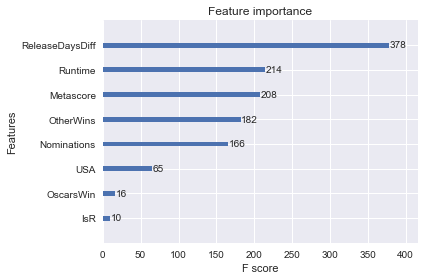

In [69]:
xgboost.plot_importance(grid_searchxgb.best_estimator_)
plt.tight_layout()
plt.savefig('xgboostfi.png')

In [50]:
predictionsxgbtest = grid_searchxgb.best_estimator_.predict(x_test)

In [51]:
testaccuracy = metrics.accuracy_score(y_test, predictionsxgbtest)
testaccuracy

0.83999999999999997

In [52]:
predictprobabtest = grid_searchxgb.best_estimator_.predict_proba(x_test)

In [53]:
predict_probatest = predictprobabtest[:,1]
predict_probatest[predict_probatest > 0.5] = 1
predict_probatest[predict_probatest <= 0.5] = 0


In [54]:
auctest = metrics.roc_auc_score(y_test, predict_probatest)
auctest

0.84004294149221681

Final Scores (Mean-accuracy or ROC-AUC)
--

* **Decision Tree**: 81.33%
* **Random Forest**: 83.97%
* **Bagging Decision Tree**: 81.33%
* **Extre Trees**: 85.99%
* **Adaboost Decision Stump**: 79.33%
* **Gradient Boosting**: 83.97%
* **Extreme Gradient Boosting**: 84%